In [4]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

#import numpy as np


# calculate accuracy measures and confusion matrix
#from sklearn import metrics




In [5]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes-1.data", names= colnames)
pima_df.groupby(["class"]).count()  # count the instances of each class in the data to check if data is skewed towards a class
#0 is non-diabetic 1 is diabetic 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [6]:
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [5]:
import seaborn as sns

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid va

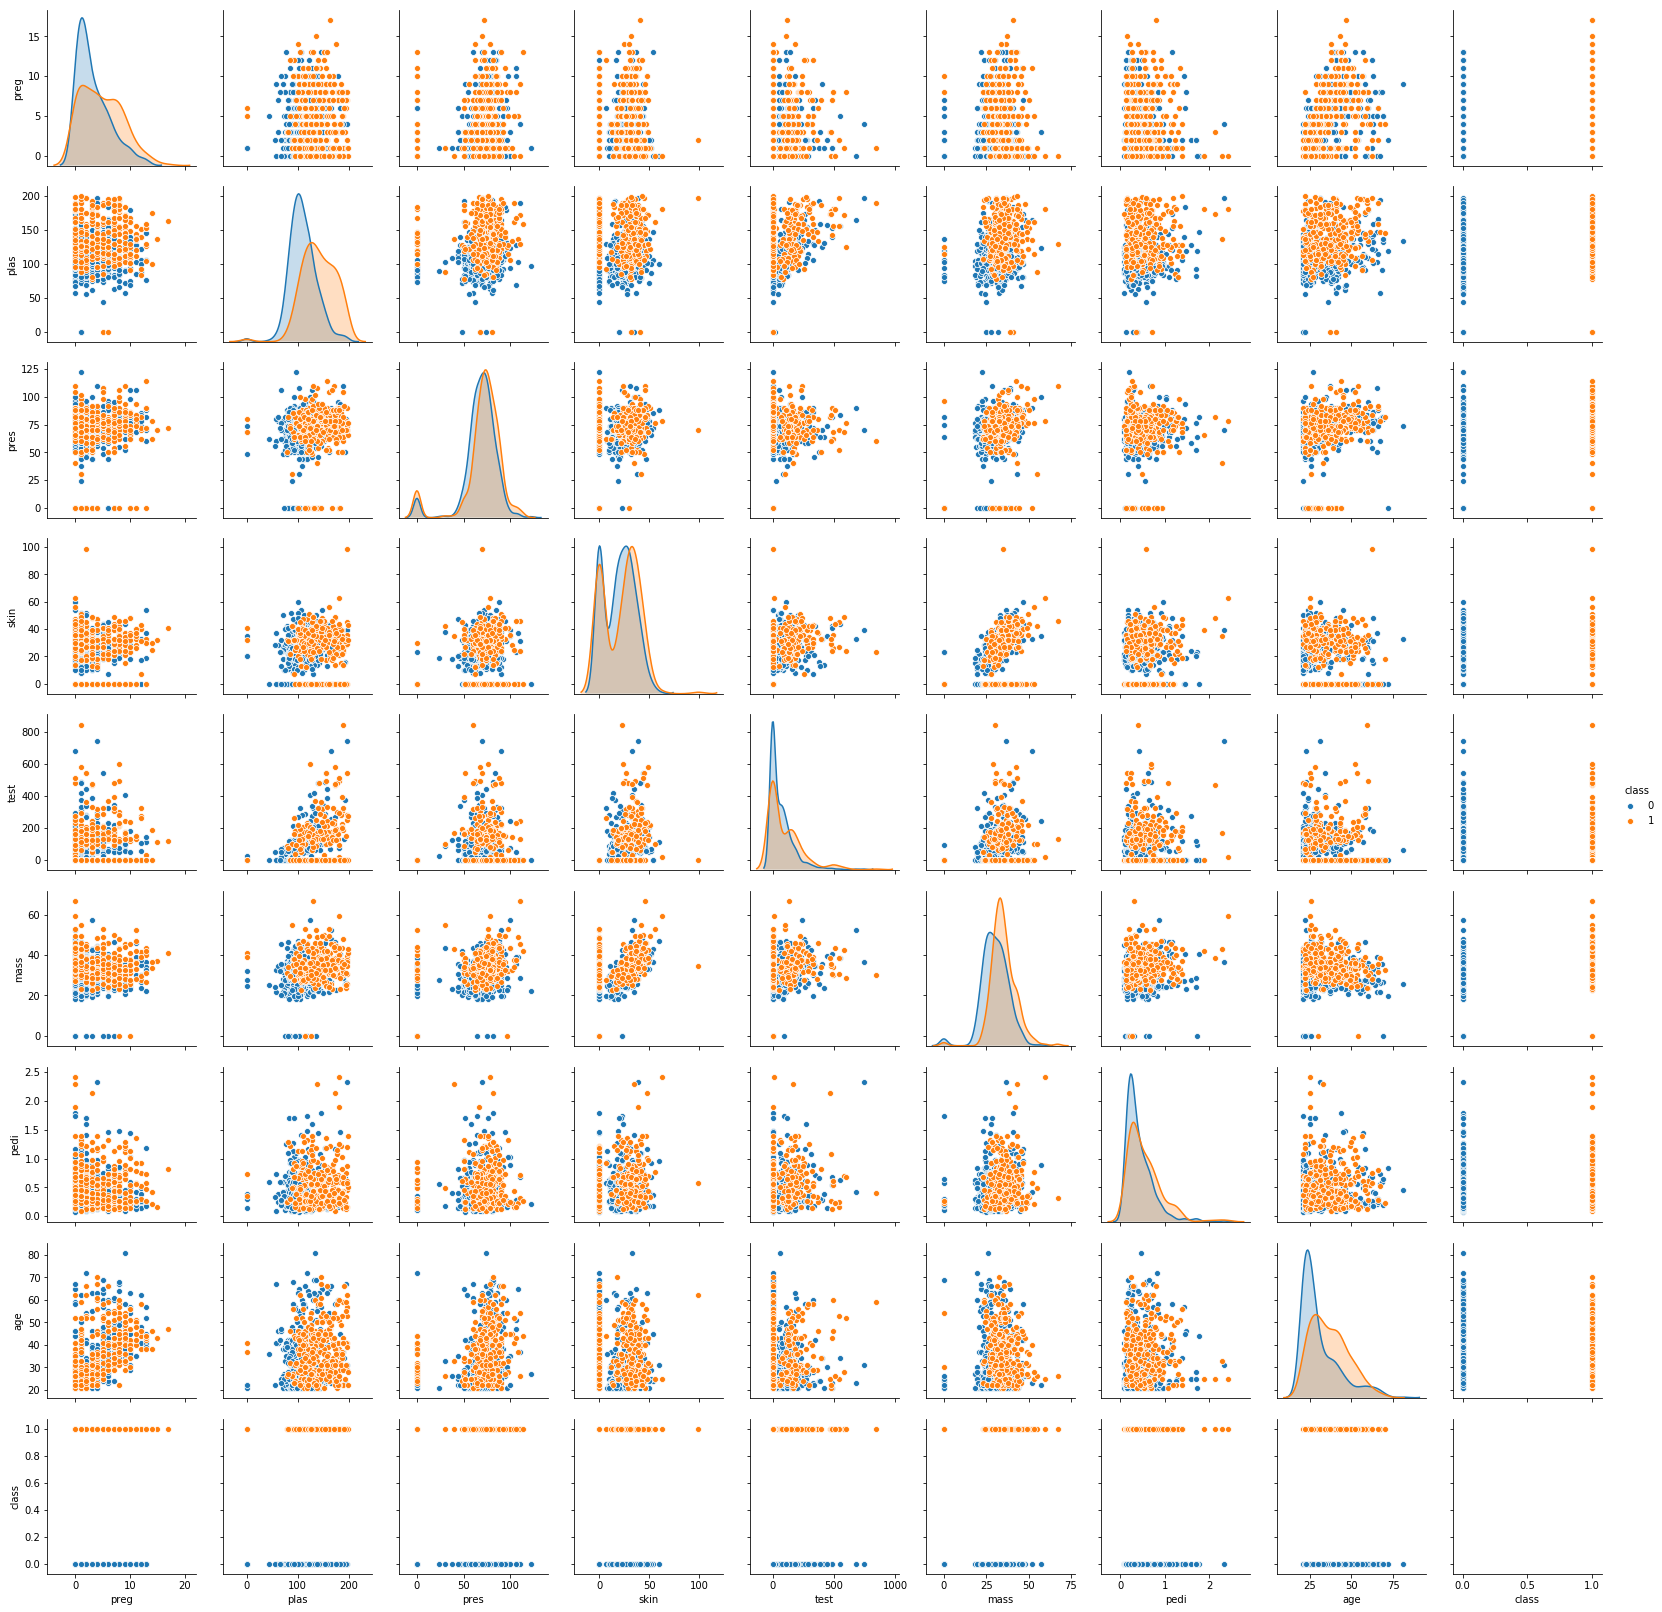

In [8]:
sns.pairplot(pima_df,hue = 'class')

In [7]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
pima_df = pima_df.fillna(pima_df.median())

In [8]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [9]:
#dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.80,1:.20}, max_depth = 9, min_samples_leaf=5 )
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
# When the weights are changed in favor of class 1 (diabetic) because their instances are half that in the other class, the 
# accuracy drops.... Why?

# When the weights are changee to favor the 0 class, the accuracy improves. ... Why?

In [10]:
lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(random_state=1)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50 , random_state=1)  
#the base_estimator can be null. The bagging classifer  will build it's own tree

enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl)], voting = 'hard')
#Ensemble inside ensemble is voting classifier

In [11]:
for clf, label in zip([lrcl , rfcl, nbcl, enclf, bgcl], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\si

Accuracy: 0.77 (+/- 0.02) [Logistic Regression]
Accuracy: 0.74 (+/- 0.02) [RandomForest]
Accuracy: 0.77 (+/- 0.02) [NaiveBayes]


C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

Accuracy: 0.76 (+/- 0.02) [Ensemble]
Accuracy: 0.75 (+/- 0.03) [Bagging]


In [12]:
for clf, label in zip([lrcl , rfcl, nbcl, enclf, bgcl], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging']):
    print("hyper parameters" , clf.get_params())

hyper parameters {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
hyper parameters {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
hyper parameters {'priors': None, 'var_smoothing': 1e-09}
hyper parameters {'estimators': [('lor', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001